In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf # Tensorflow
from tensorflow.keras import preprocessing # Text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer # Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences # Text preprocessing
from tensorflow.keras.models import Sequential # modeling neural networks
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.initializers import Constant
from tensorflow.keras import optimizers, metrics # Neural Network
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

In [8]:
# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [9]:
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
x_train.shape

(25000, 100)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length = maxlen)) # vocab = 10000 words, 8 dimensions
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 96us/sample - loss: 0.6241 - acc: 0.6720 - val_loss: 0.4758 - val_acc: 0.8028
Epoch 2/10
20000/20000 [==============================] - 2s 88us/sample - loss: 0.3738 - acc: 0.8508 - val_loss: 0.3527 - val_acc: 0.8470
Epoch 3/10
20000/20000 [==============================] - 2s 86us/sample - loss: 0.2875 - acc: 0.8848 - val_loss: 0.3275 - val_acc: 0.8576
Epoch 4/10
20000/20000 [==============================] - 2s 90us/sample - loss: 0.2484 - acc: 0.9020 - val_loss: 0.3238 - val_acc: 0.8618
Epoch 5/10
20000/20000 [==============================] - 2s 85us/sample - loss: 0.2219 - acc: 0.9137 - val_loss: 0.3216 - val_acc: 0.8620
Epoch 6/10
20000/20000 [==============================] - 2s 95us/sample - loss: 0.2007 - acc: 0.9237 - val_loss: 0.3297 - val_acc: 0.8594
Epoch 7/10
20000/20000 [==============================] - 2s 100us/sample - loss: 0.1818 - acc: 0.9327 - val_loss: 0.

In [15]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 27us/sample - loss: 0.3731 - acc: 0.8512


[0.3730532445526123, 0.85124]

In [20]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


<Figure size 432x288 with 0 Axes>

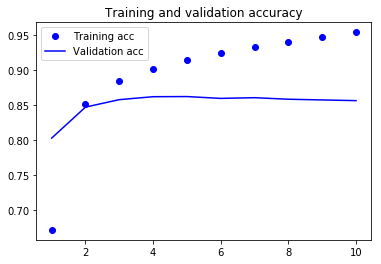

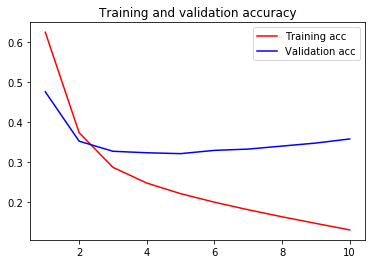

<Figure size 432x288 with 0 Axes>

In [28]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


In [36]:
import os

imdb_dir = '/home/elvi/Documents/NNetworks2020/Data/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [35]:
imdb_dir = '/home/elvi/Documents/NNetworks2020/Data/aclImdb/'
test_dir = os.path.join(imdb_dir, 'test')

labels_test = []
texts_test = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [31]:
maxlen = 100  # We will cut reviews after 100 words
training_samples = 3000  # We will be training on 200 samples
validation_samples = 1000  # We will be validating on 10000 samples
max_words = 1000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# GLOVE

In [33]:
glove_dir = '/home/elvi/Documents/NNetworks2020/Data/glove/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt')) #open Dir+file
for line in f:
    values = line.split() #break the commas
    word = values[0] # take the first Index in the doctionaru
    coefs = np.asarray(values[1:], dtype='float32') # Take the values from the dictionary
    embeddings_index[word] = coefs # Append
f.close()

print('Found %s word vectors in Glove' % len(embeddings_index))


Found 400000 word vectors in Glove


In [37]:
max_words

1000

In [38]:
embedding_dim = 100 #USE 100 words from the text 

embedding_matrix = np.zeros((max_words, embedding_dim)) #Fucking matrix con 100 palabras
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word) #GETTTT FROM GLOVE
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector



In [97]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, #fucking matrix!
                    input_length = maxlen))# 20 mas importantes
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
flatten_17 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_73 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_74 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 64)              

In [98]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [99]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=32,
                    validation_data=(x_val, y_val))
#model.save_weights('pre_trained_glove_model.h5')

Train on 3000 samples, validate on 1000 samples
Epoch 1/300
3000/3000 [==============================] - 2s 752us/sample - loss: 7.1093 - acc: 0.4870 - val_loss: 2.6480 - val_acc: 0.5060
Epoch 2/300
3000/3000 [==============================] - 1s 343us/sample - loss: 1.2244 - acc: 0.4917 - val_loss: 0.7777 - val_acc: 0.5060
Epoch 3/300
3000/3000 [==============================] - 1s 344us/sample - loss: 0.7781 - acc: 0.4900 - val_loss: 0.7755 - val_acc: 0.5060
Epoch 4/300
3000/3000 [==============================] - 1s 344us/sample - loss: 0.7797 - acc: 0.5060 - val_loss: 0.7814 - val_acc: 0.4940
Epoch 5/300
3000/3000 [==============================] - 1s 473us/sample - loss: 0.7832 - acc: 0.4953 - val_loss: 0.8115 - val_acc: 0.5060
Epoch 6/300
3000/3000 [==============================] - 1s 425us/sample - loss: 0.7924 - acc: 0.5103 - val_loss: 0.7800 - val_acc: 0.5060
Epoch 7/300
3000/3000 [==============================] - 1s 456us/sample - loss: 0.7830 - acc: 0.4927 - val_loss: 0.79

3000/3000 [==============================] - 1s 344us/sample - loss: 0.8228 - acc: 0.5303 - val_loss: 1.3098 - val_acc: 0.4950
Epoch 60/300
3000/3000 [==============================] - 1s 341us/sample - loss: 0.8186 - acc: 0.5213 - val_loss: 0.9512 - val_acc: 0.4940
Epoch 61/300
3000/3000 [==============================] - 1s 347us/sample - loss: 0.9209 - acc: 0.5340 - val_loss: 1.5158 - val_acc: 0.4940
Epoch 62/300
3000/3000 [==============================] - 1s 340us/sample - loss: 0.8671 - acc: 0.5250 - val_loss: 1.2695 - val_acc: 0.4940
Epoch 63/300
3000/3000 [==============================] - 1s 340us/sample - loss: 0.8117 - acc: 0.5217 - val_loss: 1.6032 - val_acc: 0.4940
Epoch 64/300
3000/3000 [==============================] - 1s 340us/sample - loss: 1.2592 - acc: 0.5257 - val_loss: 1.4022 - val_acc: 0.4980
Epoch 65/300
3000/3000 [==============================] - 1s 342us/sample - loss: 0.7774 - acc: 0.5323 - val_loss: 1.1574 - val_acc: 0.4920
Epoch 66/300
3000/3000 [=========

3000/3000 [==============================] - 1s 340us/sample - loss: 0.7848 - acc: 0.5317 - val_loss: 1.4433 - val_acc: 0.4990
Epoch 118/300
3000/3000 [==============================] - 1s 349us/sample - loss: 0.7835 - acc: 0.5220 - val_loss: 5.3466 - val_acc: 0.4940
Epoch 119/300
3000/3000 [==============================] - 1s 344us/sample - loss: 0.7772 - acc: 0.5137 - val_loss: 0.8919 - val_acc: 0.4910
Epoch 120/300
3000/3000 [==============================] - 1s 344us/sample - loss: 0.7706 - acc: 0.5087 - val_loss: 1.8720 - val_acc: 0.5030
Epoch 121/300
3000/3000 [==============================] - 1s 347us/sample - loss: 1.0020 - acc: 0.5313 - val_loss: 7.0931 - val_acc: 0.4990
Epoch 122/300
3000/3000 [==============================] - 1s 342us/sample - loss: 0.7924 - acc: 0.5243 - val_loss: 1.0976 - val_acc: 0.4950
Epoch 123/300
3000/3000 [==============================] - 1s 340us/sample - loss: 0.7569 - acc: 0.5107 - val_loss: 0.8943 - val_acc: 0.4900
Epoch 124/300
3000/3000 [==

3000/3000 [==============================] - 1s 342us/sample - loss: 0.7821 - acc: 0.5507 - val_loss: 6.5067 - val_acc: 0.5020
Epoch 176/300
3000/3000 [==============================] - 1s 340us/sample - loss: 0.7875 - acc: 0.5420 - val_loss: 2.0784 - val_acc: 0.5000
Epoch 177/300
3000/3000 [==============================] - 1s 354us/sample - loss: 0.7400 - acc: 0.5427 - val_loss: 3.9667 - val_acc: 0.5040
Epoch 178/300
3000/3000 [==============================] - 1s 353us/sample - loss: 0.8439 - acc: 0.5490 - val_loss: 30.5111 - val_acc: 0.5020
Epoch 179/300
3000/3000 [==============================] - 1s 342us/sample - loss: 0.8727 - acc: 0.5457 - val_loss: 6.7291 - val_acc: 0.4980
Epoch 180/300
3000/3000 [==============================] - 1s 339us/sample - loss: 0.7659 - acc: 0.5310 - val_loss: 2.7125 - val_acc: 0.4980
Epoch 181/300
3000/3000 [==============================] - 1s 342us/sample - loss: 0.8660 - acc: 0.5467 - val_loss: 4.3678 - val_acc: 0.4970
Epoch 182/300
3000/3000 [=

3000/3000 [==============================] - 1s 339us/sample - loss: 0.7594 - acc: 0.5520 - val_loss: 3.0898 - val_acc: 0.5000
Epoch 234/300
3000/3000 [==============================] - 1s 340us/sample - loss: 0.8390 - acc: 0.5540 - val_loss: 18.7541 - val_acc: 0.5200
Epoch 235/300
3000/3000 [==============================] - 1s 343us/sample - loss: 1.1435 - acc: 0.5520 - val_loss: 4.0531 - val_acc: 0.5030
Epoch 236/300
3000/3000 [==============================] - 1s 346us/sample - loss: 0.8519 - acc: 0.5517 - val_loss: 7.0792 - val_acc: 0.5000
Epoch 237/300
3000/3000 [==============================] - 1s 348us/sample - loss: 0.7352 - acc: 0.5563 - val_loss: 3.3490 - val_acc: 0.5030
Epoch 238/300
3000/3000 [==============================] - 1s 338us/sample - loss: 0.7898 - acc: 0.5477 - val_loss: 7.1093 - val_acc: 0.5020
Epoch 239/300
3000/3000 [==============================] - 1s 339us/sample - loss: 0.7822 - acc: 0.5420 - val_loss: 2.3837 - val_acc: 0.5030
Epoch 240/300
3000/3000 [=

3000/3000 [==============================] - 1s 344us/sample - loss: 0.7436 - acc: 0.5413 - val_loss: 39.2491 - val_acc: 0.5210
Epoch 292/300
3000/3000 [==============================] - 1s 343us/sample - loss: 1.8619 - acc: 0.5617 - val_loss: 11.7421 - val_acc: 0.5080
Epoch 293/300
3000/3000 [==============================] - 1s 351us/sample - loss: 0.7590 - acc: 0.5433 - val_loss: 2.9183 - val_acc: 0.5080
Epoch 294/300
3000/3000 [==============================] - 1s 344us/sample - loss: 0.7342 - acc: 0.5510 - val_loss: 3.7772 - val_acc: 0.5080
Epoch 295/300
3000/3000 [==============================] - 1s 346us/sample - loss: 0.7614 - acc: 0.5503 - val_loss: 13.7073 - val_acc: 0.5050
Epoch 296/300
3000/3000 [==============================] - 1s 345us/sample - loss: 4.7347 - acc: 0.5460 - val_loss: 13.2864 - val_acc: 0.5070
Epoch 297/300
3000/3000 [==============================] - 1s 341us/sample - loss: 0.8126 - acc: 0.5520 - val_loss: 6.6098 - val_acc: 0.5070
Epoch 298/300
3000/3000

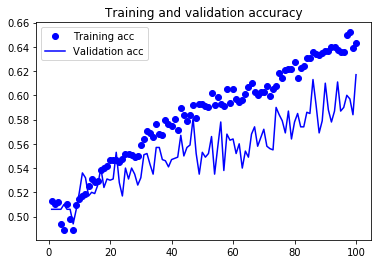

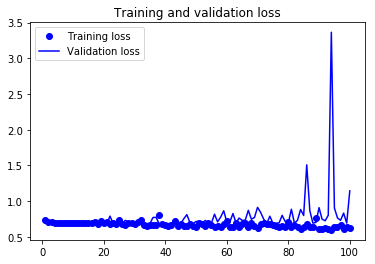

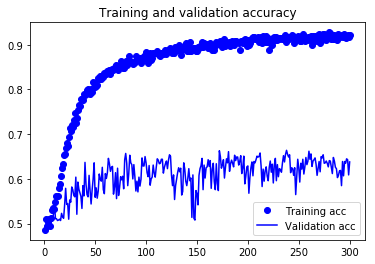

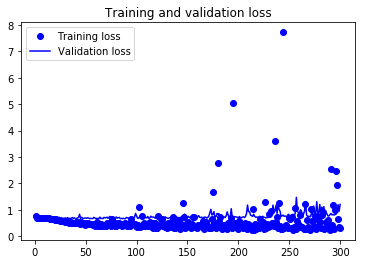

In [88]:
import matplotlib.pyplot as plt


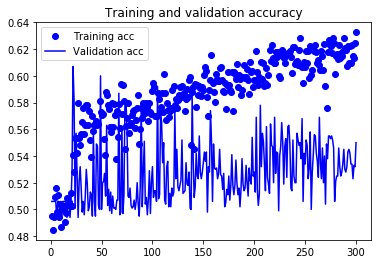

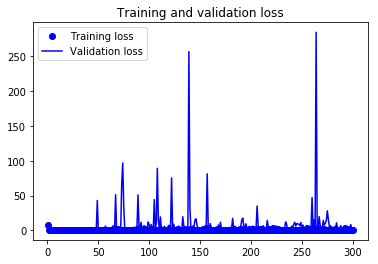

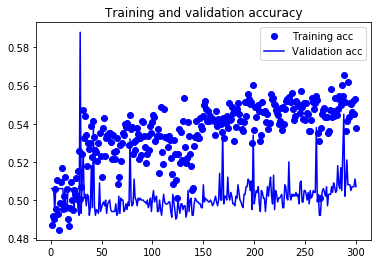

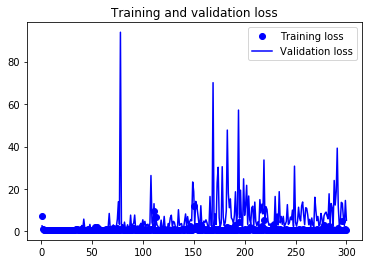

In [100]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [102]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [104]:
#model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 93us/sample - loss: 3.1093 - acc: 0.5300


[3.1093115486145018, 0.53]